# Biometric facial recognition system

This project involves facial recognition using the Olivetti Faces dataset. Here's a breakdown of what the code does:

- Loading and Visualizing Data: 
The Olivetti Faces dataset is loaded, containing grayscale images of faces. The function show_40_distinct_people displays a subset of 40 distinct faces from the dataset.

- Principal Component Analysis (PCA): 
PCA is applied to reduce the dimensionality of the dataset. The code visualizes the PCA components and the explained variance ratio to understand the contribution of each component.

- Training a Support Vector Classifier (SVC): 
The reduced dataset is split into training and testing sets. An SVC model is trained on the training data and tested on the testing data. The accuracy of the classifier is evaluated.

- Comparing Different Models: 
Various classification models including Linear Discriminant Analysis (LDA), Logistic Regression (LR), Naive Bayes (NB), K-Nearest Neighbors (KNN), Decision Tree (DT), and Support Vector Machine (SVM) are trained and evaluated on the dataset. The accuracy scores of each model are displayed.

- Cross-Validation: 
Cross-validation is performed to evaluate the models' performance more robustly.

- Multiclass Classification: 
The project extends to multiclass classification using the One-vs-Rest strategy with SVC. Precision-Recall curves are plotted to evaluate the classifier's performance across different classes.

This project essentially showcases the process of facial recognition using machine learning techniques, from data preprocessing to model training and evaluation. It also demonstrates techniques like PCA for dimensionality reduction and cross-validation for model validation.

In [270]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from funcsigs import signature
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [233]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces()
images = data['images']
target = data['target']
data = data['data']

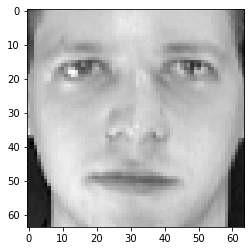

In [234]:
# Display the first image in grayscale
plt.imshow(images[0], cmap='gray')
plt.show()

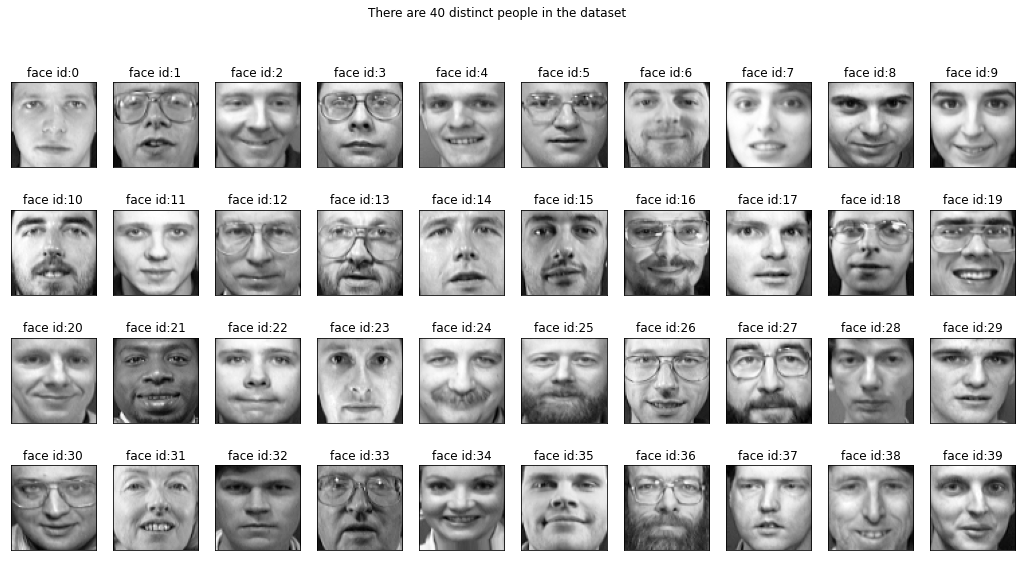

In [237]:
# Function to show 40 distinct people's faces
def show_40_distinct_people(images, unique_ids):
    """
    Display 40 distinct people's faces from the dataset.
    
    Args:
    - images: Array of face images.
    - unique_ids: Array of unique identifiers for each person.
    """
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for unique_id in unique_ids:
        image_index = unique_id * 10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id: {}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(images, np.unique(target))

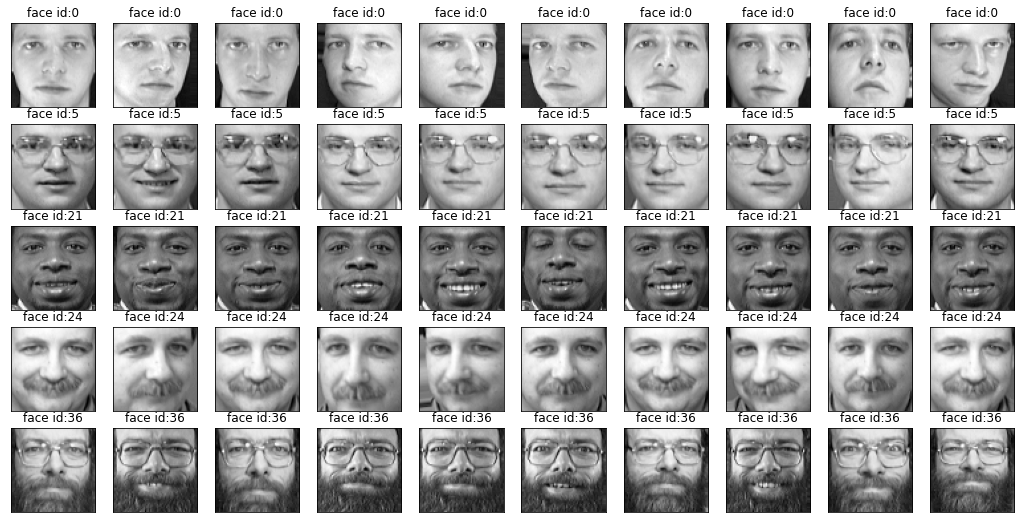

In [239]:
# Function to show 10 faces of specific subjects
def show_10_faces_of_n_subject(images, subject_ids):
    """
    Display 10 faces of specified subjects.
    
    Args:
    - images: Array of face images.
    - subject_ids: Array of subject IDs for whom to display images.
    """
    cols = 10
    rows = len(subject_ids)
    
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id * 10 + j
            axarr[i, j].imshow(images[image_index], cmap="gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title("face id: {}".format(subject_id))

show_10_faces_of_n_subject(images, subject_ids=[0,5, 21, 24, 36])

In [240]:
# Split the dataset into training and testing sets
X = data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape: {}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [242]:
# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

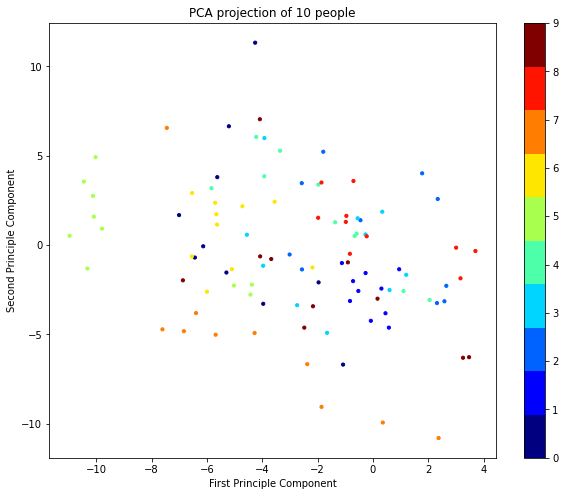

In [243]:
# Visualize PCA projection of faces
number_of_people = 10
index_range = number_of_people * 10
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
scatter = ax.scatter(X_pca[:index_range, 0], X_pca[:index_range, 1], c=target[:index_range], s=10,
                     cmap=plt.get_cmap('jet', number_of_people))
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("PCA projection of {} people".format(number_of_people))
fig.colorbar(scatter)

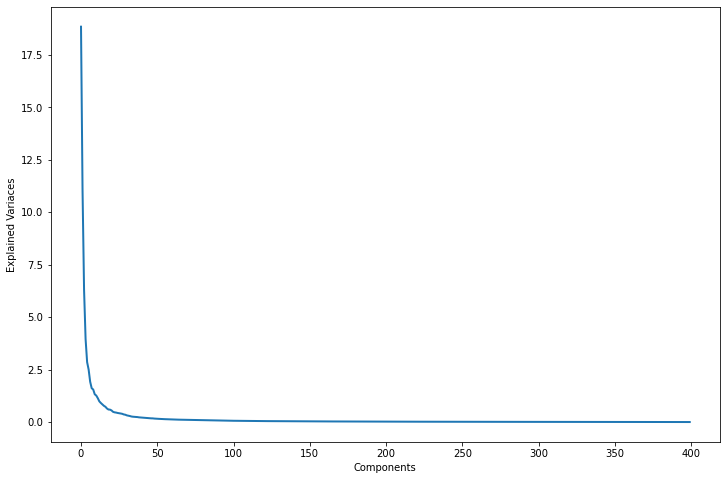

In [244]:
# Plot explained variance ratio for each component
plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [246]:
# Reduce dimensionality using PCA for training data
n_components = 90
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

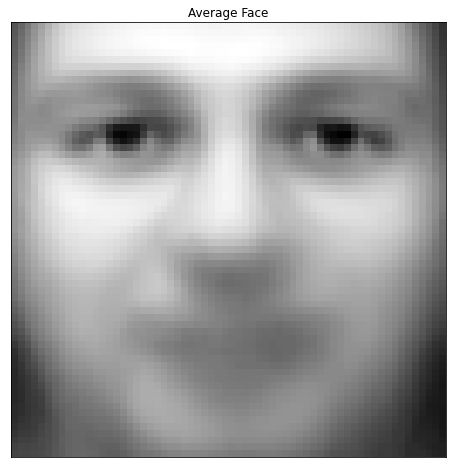

In [247]:
# Display the average face
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

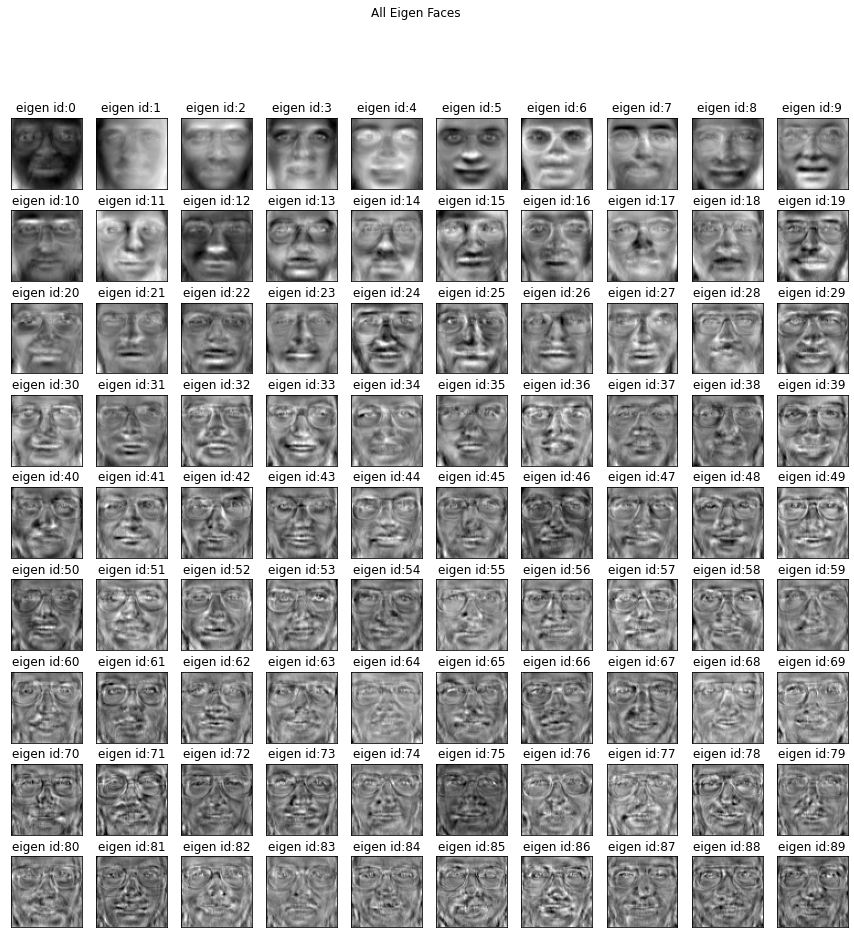

In [283]:
# Display eigenfaces
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, images.shape[1], images.shape[2]))

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id: {}".format(i))
plt.suptitle("All Eigen Faces")

In [249]:
# Transform data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [250]:
# Train a Support Vector Classifier (SVC) and evaluate its accuracy
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))

accuracy score:0.91


<AxesSubplot:>

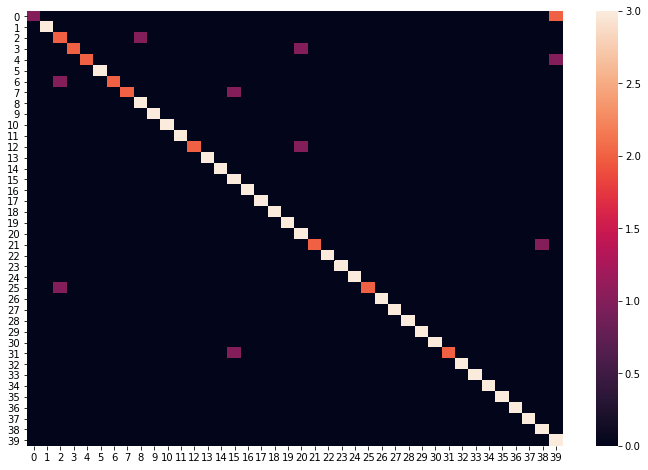

In [251]:
# Visualize confusion matrix
plt.figure(1, figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred))

In [252]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [268]:
# Compare performance of various classifiers
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR", LogisticRegression()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

for name, model in models:
    clf = model
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    print(10 * "=", "{} Result".format(name).upper(), 10 * "=")
    print("Accuracy score: {:0.2f}".format(accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.92

========== NB RESULT ==========
Accuracy score:0.86

========== KNN RESULT ==========
Accuracy score:0.69

========== DT RESULT ==========
Accuracy score:0.62

========== SVM RESULT ==========
Accuracy score:0.91



In [269]:
# Perform cross-validation for each classifier
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score: {:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.94
NB mean cross validations score:0.79
KNN mean cross validations score:0.69
DT mean cross validations score:0.48
SVM mean cross validations score:0.88


In [271]:
# Fit Linear Discriminant Analysis (LDA) and evaluate its accuracy
lr = LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy score:0.93


In [272]:
# Helper function to plot a gallery of portraits
def plot_gallery(images, titles, n_row=4, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((64, 64)), cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

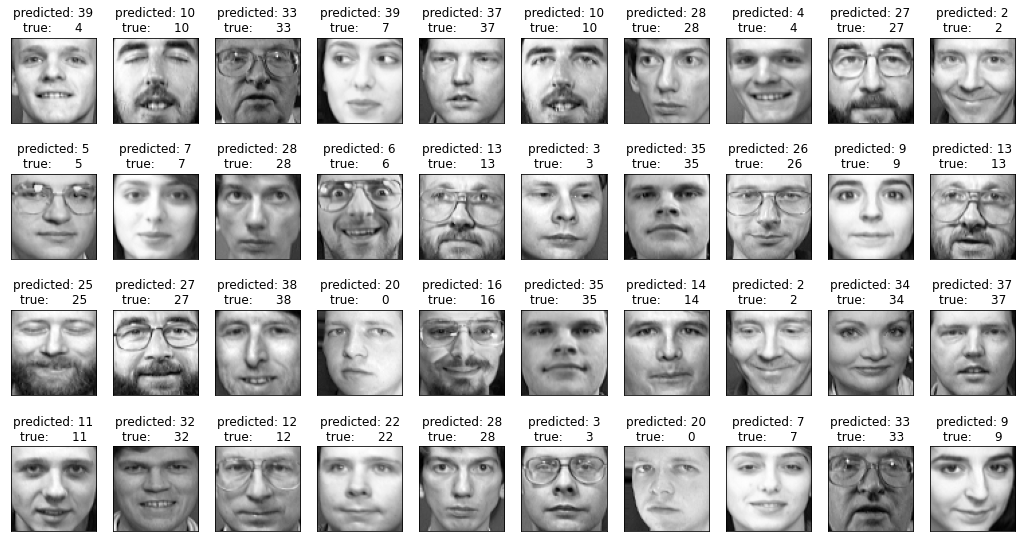

In [273]:
# Helper function to generate titles for predicted and true labels
def title(y_pred, y_test, target_names, i):
    pred_name = y_pred[i]
    true_name = y_test[i]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

# Plot gallery of predicted faces
prediction_titles = [title(y_pred, y_test, target, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles)

In [275]:
# Binarize the target labels
Target = label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[1])

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [276]:
# Split data into training and testing sets for multiclass classification
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X, 
                                                                                              Target,
                                                                                              test_size=0.3,
                                                                                              stratify=Target,
                                                                                              random_state=0)

In [277]:
# Perform PCA for multiclass data
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca = pca.transform(X_train_multiclass)
X_test_multiclass_pca = pca.transform(X_test_multiclass)

In [278]:
# Train a One-vs-Rest Classifier and get decision scores
oneRestClassifier = OneVsRestClassifier(clf)
oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score = oneRestClassifier.decision_function(X_test_multiclass_pca)

In [279]:
# Compute precision, recall, and average precision
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multiclass[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# Micro-average precision and recall
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_multiclass.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_multiclass, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))


Average precision score, micro-averaged over all classes: 0.97


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

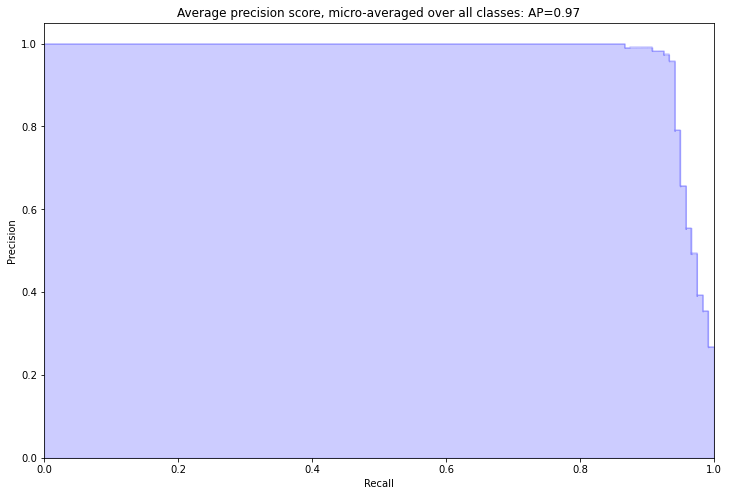

In [280]:
# Plot precision-recall curve
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.figure(1, figsize=(12, 8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))